In [1]:
#import needed packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#temp anomaly data, open excel 
tfilepath = ('data/temp_annomaly.xls')

#adjust/set headers (would show no headers/index in excel), get values from excel sheet
tempa_headers = 7
tempa= pd.read_excel(tfilepath, sheet_name='Data', header=tempa_headers)
##display(tempa)

#created easier to use year and anomaly variables using iloc
tyear = tempa.iloc[:,0]
tanon = tempa.iloc[:,2]

#found earliest and newest temp anomaly year with .iloc
firstt= tyear.iloc[0]
lastt= tyear.iloc[-1]

In [3]:
#create linear regression for temp anomaly
slope, intercept, rvalue, pvalue, stderr = stats.linregress(tyear, tanon)

print('Slope:', slope.round(4), 'ºC/year')

#create line for temp anomaly with y=mx+b
tanom_linreg = slope*tyear+intercept

Slope: 0.0023 ºC/year


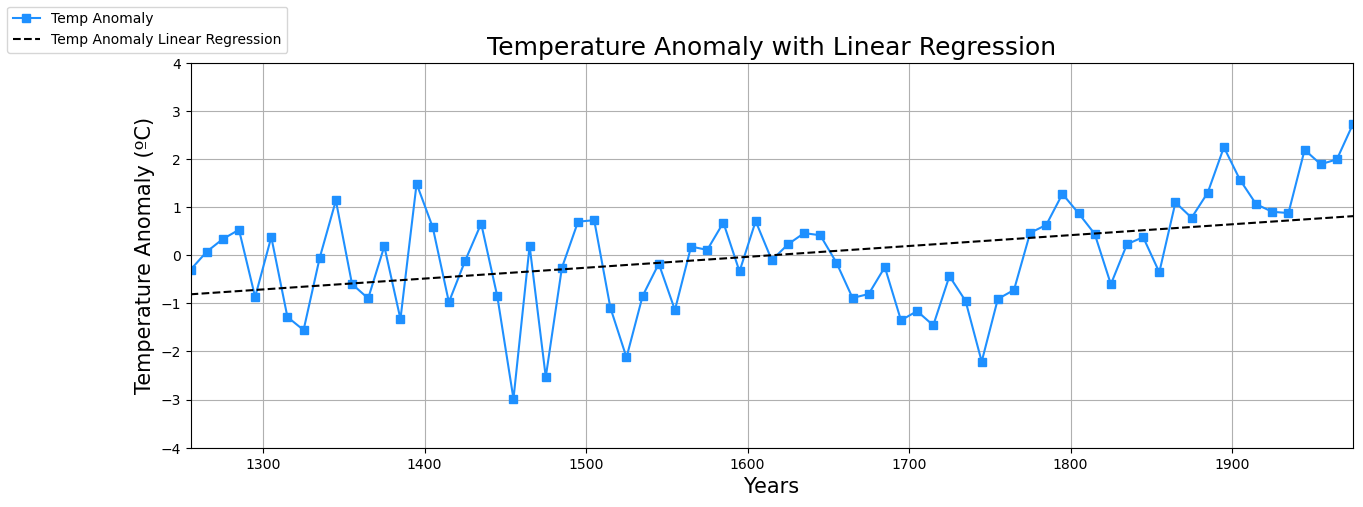

In [4]:
#plotting temp anomaly and its linear regression to most clearly show temperature trend
fig, ax = plt.subplots(figsize=(15,5))

#plot temp anomaly and its linear regression
ax.plot(tyear, tanon, c='dodgerblue', label='Temp Anomaly', marker='s', markersize=6)
ax.plot(tyear, tanom_linreg, c='k', ls='--', label='Temp Anomaly Linear Regression')

#set title and axis labels, create grid
ax.set_xlabel('Years', fontsize=15)
ax.set_ylabel('Temperature Anomaly (ºC)', fontsize=15)
ax.set_title('Temperature Anomaly with Linear Regression', fontsize=18)
ax.grid()

#set axis limits to feature same dataset length and centrallity with consistancy through all plots
ax.set_xlim(firstt, lastt)
ax.set_ylim(-4,4)

#created figure legend so all lines are together on legend
#stack overflow https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
fig.legend(loc='upper left')

plt.show()

WAIS CO2 Data

In [5]:
#1st set (WAIS Divide Core 1,200 Year Atmospheric CO2 and CO2 Stable Isotope Data)
w1filepath = ('data/wais2015co2.txt')
wais15_file = open(w1filepath, 'r')

#read file to observe structure, headers and columns, comment out for easier processing/coding
##for l in range(100):
    ##line = wais2015.readline()
    ##print(line)
    
wais15_file.close()

#create variables for reading from lines from loop
wais15_headerlines = 108
wais15_data= (2,3)

#use genfromtxt to read file into array
wais2015= np.genfromtxt(w1filepath, skip_header=wais15_headerlines, usecols=wais15_data, dtype=float)
##display(wais2015)

#set variables into array for age(year) and co2(ppm), sliced to match temp years
w1_age = wais2015[:,0]
w1_co2 = wais2015[:,1]

In [6]:
#2nd set (West Antarctic Ice Sheet (WAIS) Ice Core WDC-05A 1000 Year CO2 Data)
w2filepath = ('data/wais2012co2.xls')

#adjust/set headers (would show no headers/index in excel), get values from excel sheet
w2_headers = 5
w2_data = (1,2)
wais2012 = pd.read_excel(w2filepath, sheet_name='WDC-05A CO2', usecols=w2_data, header=w2_headers)
##display(wais2012)

#set variables using .iloc for easier graphing
#started at 1 as row 0 is column headers
w2_age = wais2012.iloc[1:,0]
w2_co2 = wais2012.iloc[1:,1]

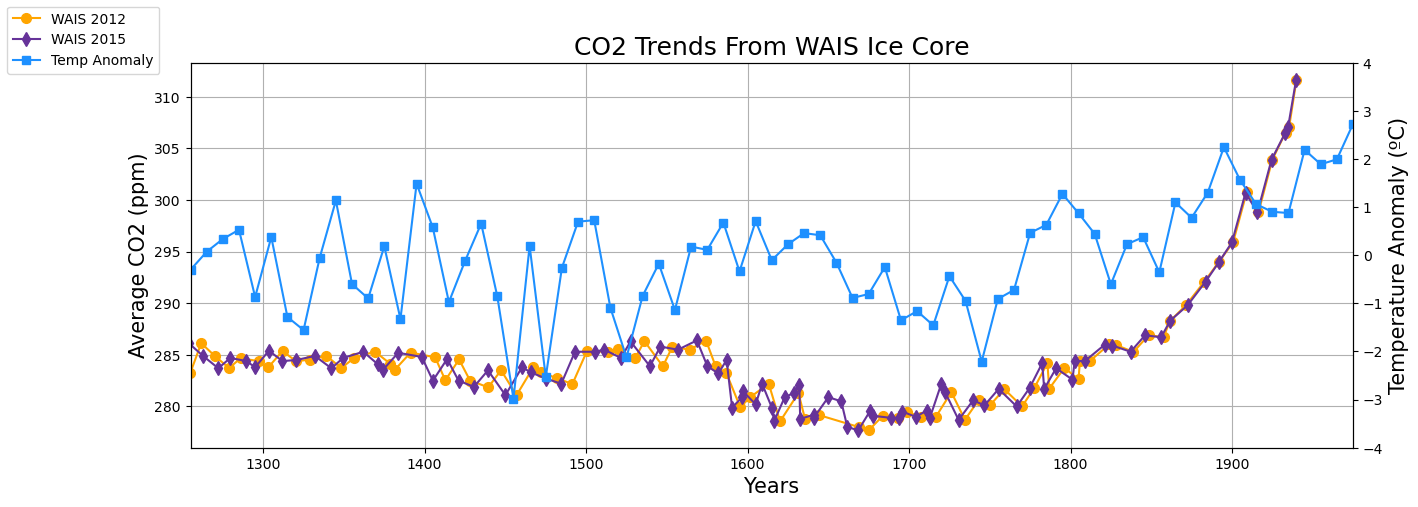

In [11]:
##Temp anonaly vs WAIS Graph
fig, ax = plt.subplots(figsize=(15,5))

#plot CO2 data with 2015 after so it sits on top
ax.plot(w2_age, w2_co2, c='orange', label='WAIS 2012', marker='o', markersize=7)
ax.plot(w1_age, w1_co2, c='rebeccapurple', label='WAIS 2015', marker='d', markersize=7)

#set 2nd axis with .twinx() https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
ax2 = ax.twinx()

#plot temp anomaly
ax2.plot(tyear, tanon, c='dodgerblue', label='Temp Anomaly', marker='s', markersize=6)

#set title and labels for all axis
ax.set_ylabel('Average CO2 (ppm)', fontsize=15)
ax.set_xlabel('Years', fontsize=15)
ax2.set_ylabel('Temperature Anomaly (ºC)', fontsize=15)
ax.set_title('CO2 Trends From WAIS Ice Core', fontsize=18)
ax.grid()

#set axis limits to feature same dataset length and size temp axis for clarity/consistency
ax.set_xlim(firstt, lastt)
ax2.set_ylim(-4,4)

#created figure legend so all parameters are together
fig.legend(loc='upper left')

plt.show()

Law Dome Data

In [8]:
#1st set (Law Dome, Antarctica 2000 Year Ice Core CO2, CH4, N2O and d13C-CO2 Data)
l1filepath = ('data/law2018co2.txt')
law18_file = open(l1filepath, 'r')

#read file to observe structure, headers and columns, comment out for easier processing/coding
##for l in range(120):
    ##line = law18_file.readline()
    ##print(line)
    
law18_file.close()

#create variables for reading file
law18_headerlines = 111
law18_data= (2,3,4)

#use genfromtxt to read file into array
law2018 = np.genfromtxt(l1filepath, skip_header=law18_headerlines, usecols=law18_data, dtype=float)
##display(law2018)

#set variables into array for ages(year) and co2(ppm)
l1_iceage = law2018[:,0]
l1_co2age = law2018[:,1]
l1_co2 = law2018[:,2]

In [9]:
#set 2 (Law Dome Ice Core 2000-Year CO2, CH4, and N2O Data)
l2filepath = ('data/law2006-co2-noaa.txt')
law06_file = open(l2filepath, 'r')

#read file to observe structure, headers and columns, comment out for easier processing/coding
##for l in range(120):
    ##line = law06_file.readline()
    ##print(line)
    
law06_file.close()

#create variables for reading
law06_headerlines = 295
law06_data= (1,2)

#use genfromtxt to read file into array
law2006 = np.genfromtxt(l2filepath, skip_header=law06_headerlines, usecols=law06_data, dtype=float)
##print(law18)

#set variables into array for ages(year) and co2(ppm)
l2_age = law2006[:,0]
l2_co2 = law2006[:,1]

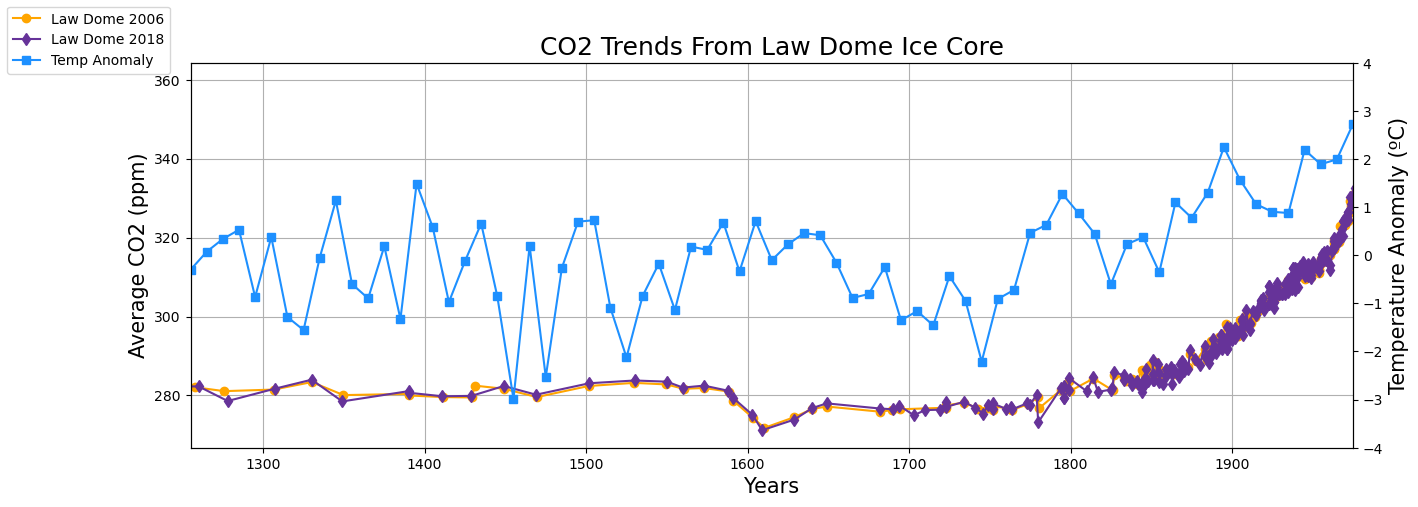

In [10]:
#plotting temp anomaly vs law dome CO2
fig, ax = plt.subplots(figsize=(15,5))

#plot CO2 data as scatter
#plot 2018 data on top of 2006 so most recent is most visable
ax.plot(l2_age, l2_co2, c='orange', label='Law Dome 2006', marker='o')
ax.plot(l1_co2age, l1_co2, c='rebeccapurple', label='Law Dome 2018', marker='d')

#set 2nd axis with .twinx() https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
ax2 = ax.twinx()

#plot temp anomaly on second axis
ax2.plot(tyear, tanon, c='dodgerblue', label='Temp Anomaly', marker='s', markersize=6)

#set title and labels
ax.set_ylabel('Average CO2 (ppm)', fontsize=15)
ax.set_xlabel('Years', fontsize=15)
ax2.set_ylabel('Temperature Anomaly (ºC)', fontsize=15)
ax.set_title('CO2 Trends From Law Dome Ice Core', fontsize=18)
ax.grid()

#set axis limits to feature same dataset length and data more centrally
ax.set_xlim(firstt, lastt)
ax2.set_ylim(-4,4)

#created figure legend so all parameters are together
fig.legend(loc='upper left')

plt.show()